In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import csv
from matplotlib import cm
import sys
%matplotlib inline
#pylab.rcParams['figure.figsize'] = 8, 5

import matplotlib
from astropy.io import ascii
import mpld3
from mpld3 import plugins, utils
from statsmodels.nonparametric.smoothers_lowess import lowess
#mpld3.enable_notebook()
#mpld3.disable_notebook()

import seaborn as sns
sns.set(context='talk',style='ticks',font='serif',palette='muted',rc={"xtick.direction":"in","ytick.direction":"in"})

In [2]:
headers=['wave','f']
df = pd.read_csv('/Users/taweewat/Documents/xray_project/z_uncertain/M82_template_norm.sed', \
                      delim_whitespace=True, names=headers)

In [3]:
# f_mu = f_lambda *lambda^2/c for flux correction
df['fv']=df['f']*(df['wave']*1e-10)**2/3e8
df['freq']=3e8/(df['wave']*1e-10)

In [4]:
#df=df.sort('freq')

### Large wavelength coverage for galaxy cluster and the general shape of the spectrum
 * raw data for M82 template (red)
 * smooth version of the same spectrum (blue)

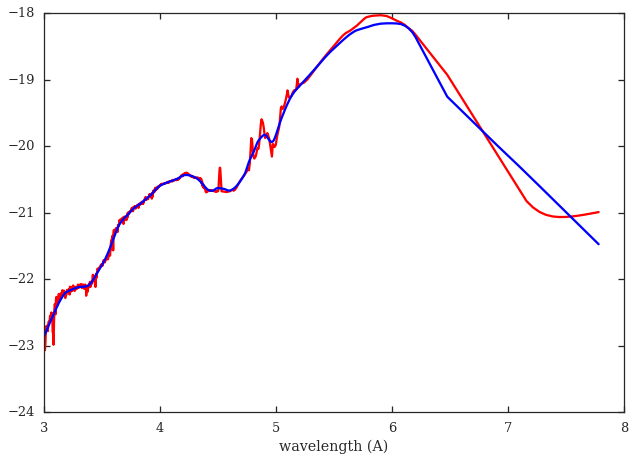

In [5]:
x=np.log10(df['wave'].values)
y=np.log10(df['fv'].values)

filtered = lowess(y, x, is_sorted=True, frac=0.07, it=0)

plt.plot(x, y, 'r')
plt.plot(x, filtered[:,1], 'b')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('wavelength (A)')

y0=filtered[:,1]

In [6]:
x2=np.linspace(x[-1]+0.0001,10.5,1000)
y22=(x2)*(1.35)
y2=(x2)*(1.35)+(y0[-1]-y22[0])

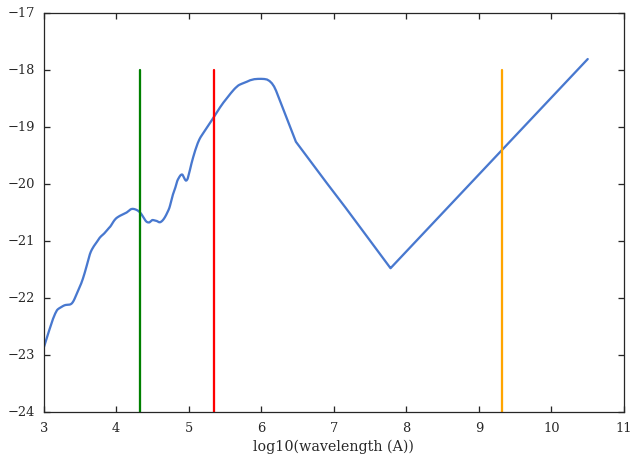

In [10]:
x3=np.concatenate((x,x2), axis=0)
y3=np.concatenate((y0,y2), axis=0)
plt.plot(x3,y3)
plt.plot(wmir0*(np.zeros(100)+1),np.linspace(-24,-18,100),'red') #np.linspace(-10,1,100)
plt.plot(wnir0*(np.zeros(100)+1),np.linspace(-24,-18,100),'green')
plt.plot(wr0*(np.zeros(100)+1),np.linspace(-24,-18,100),'orange')
plt.xlabel('log10(wavelength (A))')

In [8]:
a = pd.Series(data=x3)
b = pd.Series(data=y3)
a.name ='wave'
b.name='flux'

spec=pd.DataFrame(zip(a,b), columns=[a.name, b.name])

In [9]:
zspace=np.linspace(0,1,20)
#WISE: w4=22 micron
wmir0=np.log10(22.e-6/1.e-10)

#2MASS: J=1.235 micron
#2MASS: K=2.159 micron
wnir0=np.log10(2.159e-6/1.e-10)

#Radio: 1.4 GHz = 0.21 m (850 MHz = 0.35 m)
wr0=np.log10(0.21/1.e-10)

fm=[]
fn=[]
fr=[]
wm, wn, wr=[], [], []
fmir0=spec.ix[np.abs(spec['wave']-wmir0).idxmin()].flux
fnir0=spec.ix[np.abs(spec['wave']-wnir0).idxmin()].flux
fr0=spec.ix[np.abs(spec['wave']-wr0).idxmin()].flux
for i in zspace:
    wmir=np.log10((10**(wmir0))*(1+i))
    fmir=spec.ix[np.abs(spec['wave']-wmir).idxmin()].flux
    wnir=np.log10((10**(wnir0))*(1+i))
    fnir=spec.ix[np.abs(spec['wave']-wnir).idxmin()].flux
    wradio=np.log10((10**(wr0))*(1+i))
    fradio=spec.ix[np.abs(spec['wave']-wradio).idxmin()].flux
    fm.append(fmir)
    fn.append(fnir)
    fr.append(fradio)
    wm.append(wmir)
    wn.append(wnir)
    wr.append(wradio)
    

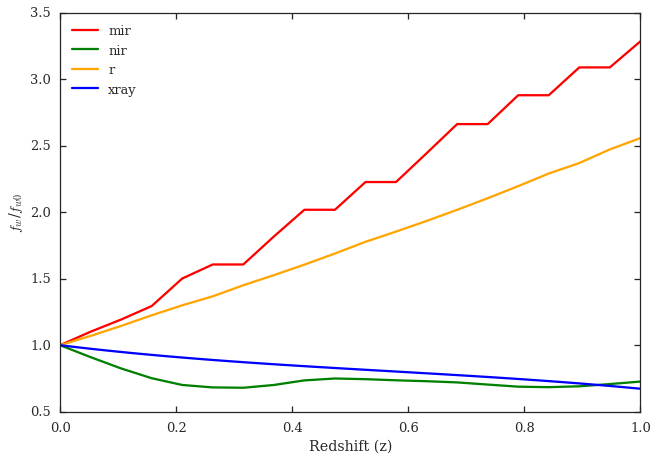

In [15]:
plt.plot(zspace,10**(fm-fmir0),'r',label='mir')
plt.plot(zspace,10**(fn-fnir0),'g',label='nir')
plt.plot(zspace,10**(fr-fr0),'orange',label='r')
plt.plot(xp, p(xp), 'blue', label='xray')
plt.xlabel('Redshift (z)')
plt.ylabel('$f_w$/$f_{w0}$')
plt.legend(loc='best')

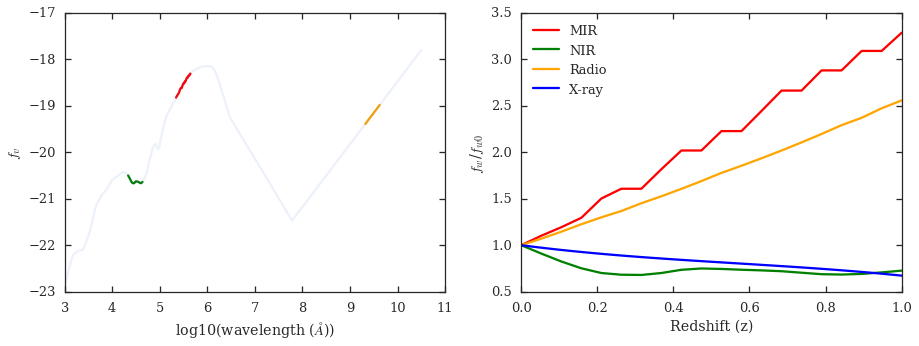

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].plot(wm,fm,'r',label='MIR')
ax[0].plot(wn,fn,'g',label='NIR')
ax[0].plot(wr,fr,'orange',label='Radio')
ax[0].plot(x3,y3,alpha=0.1)
ax[0].set_xlabel('log10(wavelength ($\AA$))')
ax[0].set_ylabel('$f_v$')

ax[1].plot(zspace,10**(fm-fmir0),'r',label='MIR')
ax[1].plot(zspace,10**(fn-fnir0),'g',label='NIR')
ax[1].plot(zspace,10**(fr-fr0),'orange',label='Radio')
ax[1].plot(xp, p(xp), 'blue', label='X-ray')
ax[1].set_xlabel('Redshift (z)')
ax[1].set_ylabel('$f_w$/$f_{w0}$')
ax[1].legend(loc='best')

#plt.legend(loc='best')

plt.savefig('/Users/taweewat/Documents/chandra/figure/z_uncertain.pdf', bbox_inches='tight')

## XRay Correction

In [13]:
headers=['z','k0.5','k1','k1.5','k2','k3','k4','k5','k6','k7','k8','k9','k10']
dff = pd.read_csv('/Users/taweewat/Documents/xray_project/z_uncertain/x_table3.dat.txt', \
                      delim_whitespace=True, names=headers)

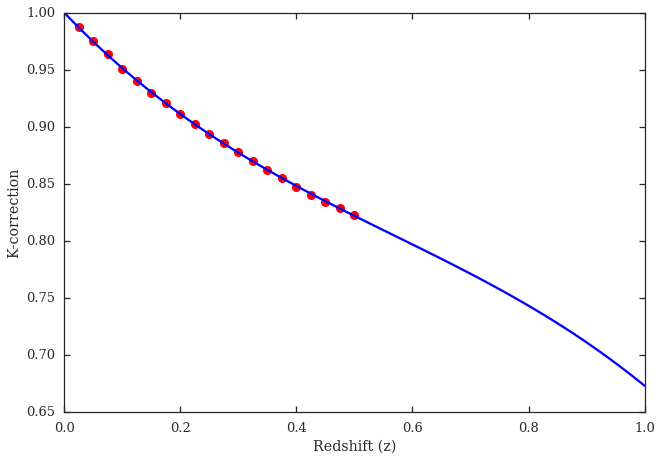

In [14]:
xr_x=dff['z']
xr_y=dff['k5']
xr_y2=dff['k10']

xr_z = np.polyfit(xr_x, xr_y, 3)
p = np.poly1d(xr_z)
xp = np.linspace(0, 1, 100)

plt.plot(xr_x, xr_y, 'ro')
plt.plot(xp, p(xp), 'b-')#, xr_x, xr_y2, 'b')
plt.xlabel('Redshift (z)')
plt.ylabel('K-correction')